# Multiple linear regression

## Import the relevant libraries

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

## Load the data

In [13]:
df = pd.read_csv('train.csv')
df.head()

,timestamp,BTC_open,BTC_high,BTC_low,BTC_close,ETH_open,ETH_high,ETH_low,ETH_close,ADA_open,ADA_high,ADA_low,ADA_close,BNB_open,BNB_high,BNB_low,BNB_close
0,2021-01-01 00:00:00,28923.63,29017.50,29017.50,28836.63,736.42,739.00,739.00,731.60,0.18134,0.18146,0.18146,0.17880,37.3596,37.4221,37.4221,37.0610
1,2021-01-01 00:30:00,28836.63,29031.34,29031.34,28995.13,731.55,735.59,735.59,734.07,0.17879,0.18077,0.18077,0.18051,37.0653,37.4423,37.4423,37.3764
2,2021-01-01 01:00:00,28995.13,29417.87,29417.87,29385.39,734.08,743.78,743.78,742.20,0.18055,0.18276,0.18276,0.18192,37.3765,37.7993,37.7993,37.7190
3,2021-01-01 01:30:00,29387.07,29470.00,29470.00,29409.99,742.19,749.00,749.00,748.28,0.18189,0.18469,0.18469,0.18358,37.7194,37.9390,37.9390,37.6134
4,2021-01-01 02:00:00,29410.00,29465.26,29465.26,29298.86,748.27,749.00,749.00,744.96,0.18361,0.18448,0.18448,0.18352,37.6134,37.7270,37.7270,37.6900


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 17 columns):
timestamp    3644 non-null object
BTC_open     3644 non-null float64
BTC_high     3644 non-null float64
BTC_low      3644 non-null float64
BTC_close    3644 non-null float64
ETH_open     3644 non-null float64
ETH_high     3644 non-null float64
ETH_low      3644 non-null float64
ETH_close    3644 non-null float64
ADA_open     3644 non-null float64
ADA_high     3644 non-null float64
ADA_low      3644 non-null float64
ADA_close    3644 non-null float64
BNB_open     3644 non-null float64
BNB_high     3644 non-null float64
BNB_low      3644 non-null float64
BNB_close    3644 non-null float64
dtypes: float64(16), object(1)
memory usage: 484.0+ KB


In [15]:
'''
#Discart all the non important features
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2
'''

'\n#Discart all the non important features\n# df.count() does not include NaN values\ndf2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]\ndel df2[\'Id\']\nprint("List of dropped columns:", end=" ")\nfor c in df.columns:\n    if c not in df2.columns:\n        print(c, end=", ")\nprint(\'\n\')\ndf = df2\n'

Let'sm take a look at how to check the distribution of a feature

count     3644.000000
mean     42927.964303
std       8848.932218
min      28836.630000
25%      34682.305000
50%      40818.825000
75%      49664.845000
max      61648.260000
Name: BTC_open, dtype: float64
count     3644.000000
mean     42936.212709
std       8849.901918
min      28836.630000
25%      34684.902500
50%      40824.045000
75%      49666.735000
max      61648.260000
Name: BTC_close, dtype: float64


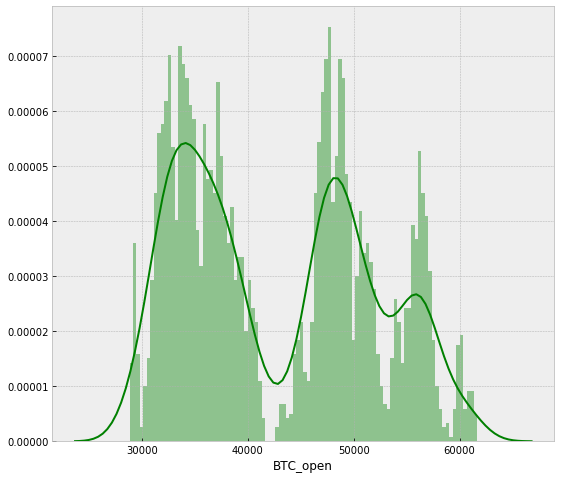

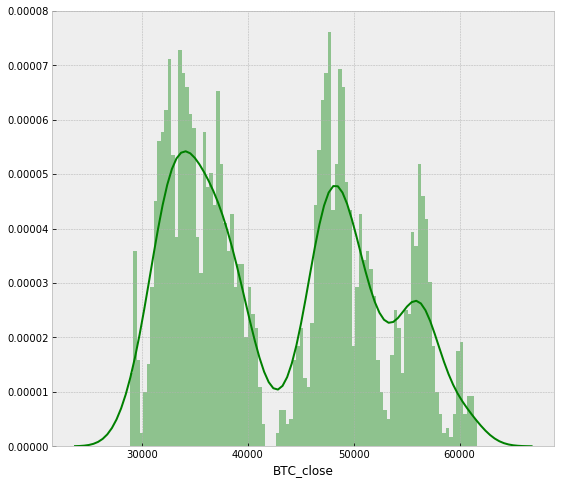

In [16]:
print(df['BTC_open'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['BTC_open'], color='g', bins=100, hist_kws={'alpha': 0.4});

time.sleep(1)

print(df['BTC_close'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['BTC_close'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Numerical Data Distribution

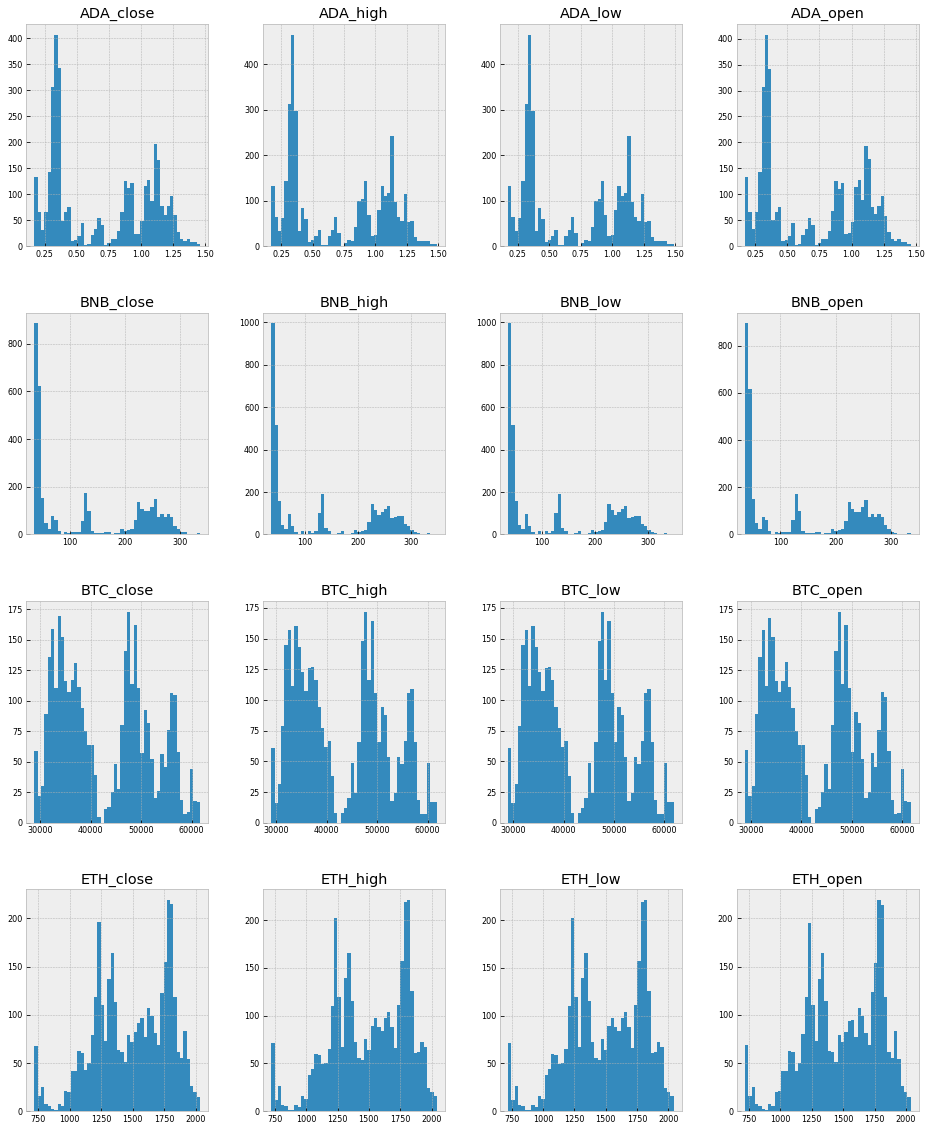

In [17]:
list(set(df.dtypes.tolist()))

df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Correlation

In [18]:
df_num_corr = df_num.corr()['BTC_open'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 15 strongly correlated values with SalePrice:
BTC_open     1.000000
BTC_low      0.999562
BTC_high     0.999562
BTC_close    0.999140
BNB_open     0.927330
BNB_low      0.926635
BNB_high     0.926635
ADA_open     0.900098
ADA_close    0.899770
ADA_low      0.898746
ADA_high     0.898746
ETH_open     0.841730
ETH_low      0.841320
ETH_high     0.841320
ETH_close    0.840676
Name: BTC_open, dtype: float64


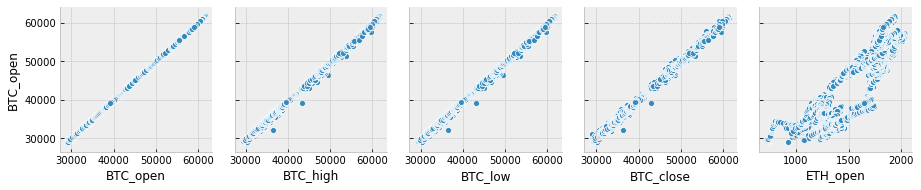

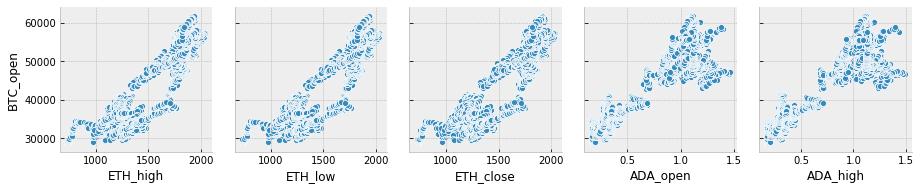

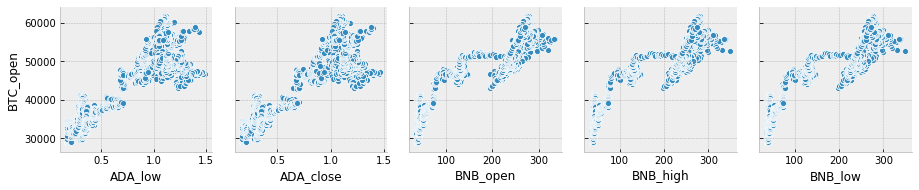

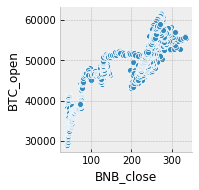

In [19]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['BTC_open'])

In [21]:
import operator


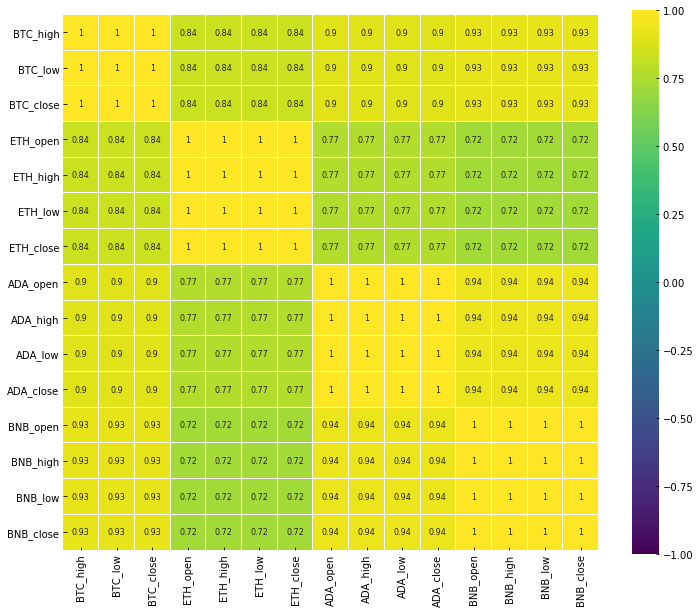

In [33]:
#corr = df_num.drop('BTC_open', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

